In [ ]:
# Import library
import pandas as pd

# Syntax untuk memuat data dari file CSV
# df = pd.read_csv('Company_data.csv')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Load data
df = pd.read_csv('Company_data.csv')

# Tampilkan ringkasan data
print(df.describe())
print("\nInfo Dataset:")
print(df.info())
print("\nShape data:", df.shape)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Shape data: (200, 4)


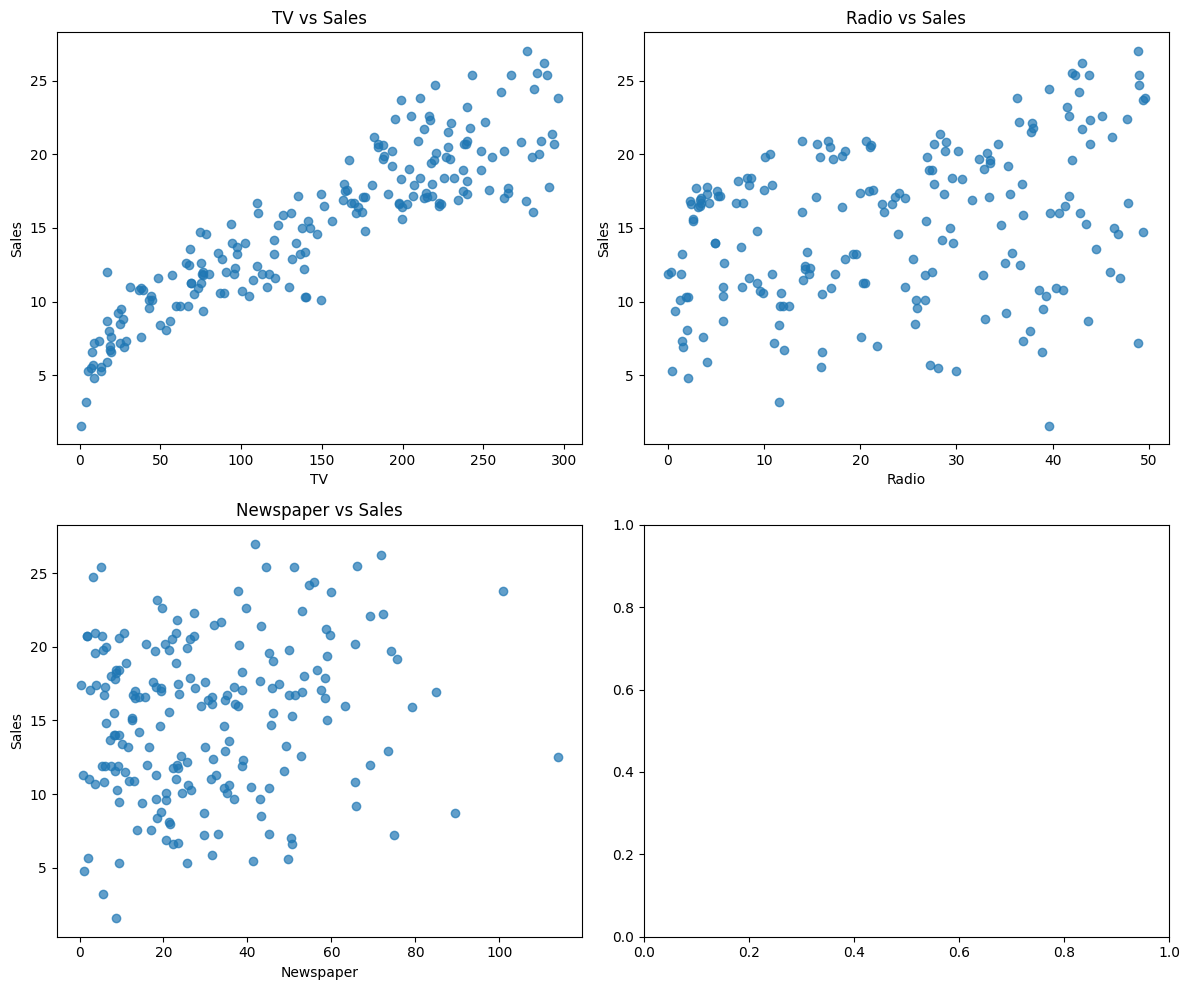

In [ ]:
# Membuat scatter plot untuk melihat hubungan antar variabel
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# TV vs Sales
axes[0,0].scatter(df['TV'], df['Sales'], alpha=0.7)
axes[0,0].set_xlabel('TV')
axes[0,0].set_ylabel('Sales')
axes[0,0].set_title('TV vs Sales')

# Radio vs Sales
axes[0,1].scatter(df['Radio'], df['Sales'], alpha=0.7)
axes[0,1].set_xlabel('Radio')
axes[0,1].set_ylabel('Sales')
axes[0,1].set_title('Radio vs Sales')

# Newspaper vs Sales
axes[1,0].scatter(df['Newspaper'], df['Sales'], alpha=0.7)
axes[1,0].set_xlabel('Newspaper')
axes[1,0].set_ylabel('Sales')
axes[1,0].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

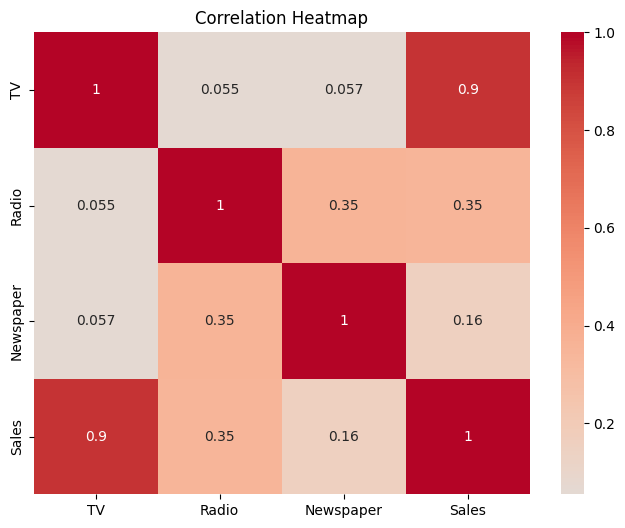

In [ ]:
# Membuat correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Model Summary - Training Data:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.69e-65
Time:                        05:52:19   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7438

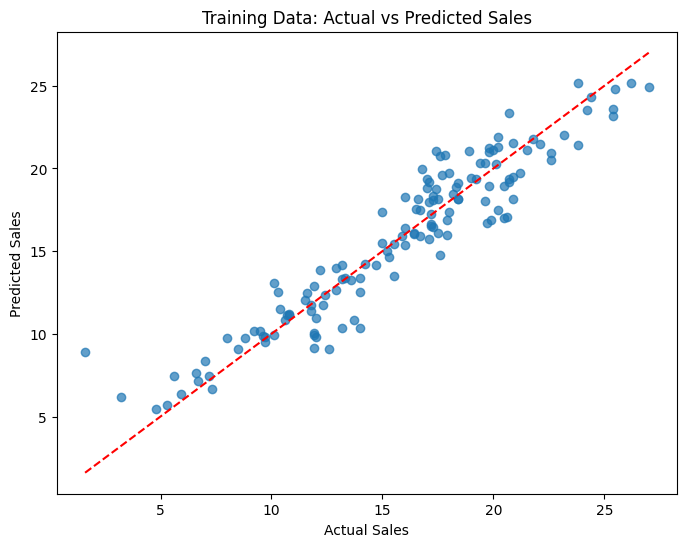


Model Equation (Training):
SALES = 4.7438 + 0.0536*TV + 0.1027*Radio + 0.0079*Newspaper


/tmp/ipython-input-6-1583875345.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"SALES = {model_train.params[0]:.4f} + {model_train.params[1]:.4f}*TV + {model_train.params[2]:.4f}*Radio + {model_train.params[3]:.4f}*Newspaper")


In [ ]:
# Memisahkan fitur dan target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menggunakan statsmodels OLS
X_train_sm = sm.add_constant(X_train)
model_train = sm.OLS(y_train, X_train_sm).fit()

print("Model Summary - Training Data:")
print(model_train.summary())

# Plot hasil prediksi vs actual untuk training data
y_pred_train = model_train.predict(X_train_sm)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Training Data: Actual vs Predicted Sales')
plt.show()

# Model equation
print(f"\nModel Equation (Training):")
print(f"SALES = {model_train.params[0]:.4f} + {model_train.params[1]:.4f}*TV + {model_train.params[2]:.4f}*Radio + {model_train.params[3]:.4f}*Newspaper")

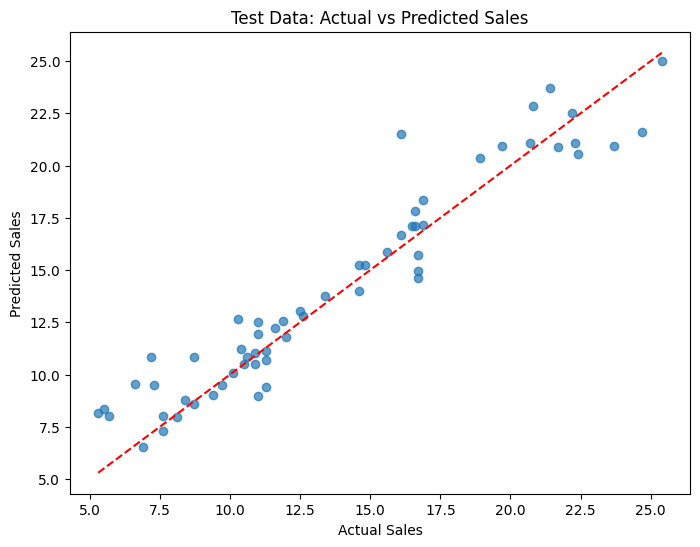

Model Equation (Testing menggunakan model training):
SALES = 4.7438 + 0.0536*TV + 0.1027*Radio + 0.0079*Newspaper


/tmp/ipython-input-7-2141155891.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"SALES = {model_train.params[0]:.4f} + {model_train.params[1]:.4f}*TV + {model_train.params[2]:.4f}*Radio + {model_train.params[3]:.4f}*Newspaper")


In [ ]:
# Testing data
X_test_sm = sm.add_constant(X_test)
y_pred_test = model_train.predict(X_test_sm)

# Plot hasil prediksi vs actual untuk testing data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Test Data: Actual vs Predicted Sales')
plt.show()

print(f"Model Equation (Testing menggunakan model training):")
print(f"SALES = {model_train.params[0]:.4f} + {model_train.params[1]:.4f}*TV + {model_train.params[2]:.4f}*Radio + {model_train.params[3]:.4f}*Newspaper")

In [ ]:
from sklearn.metrics import r2_score

# R² untuk training data
r2_train = model_train.rsquared
print(f"R² Training Data: {r2_train:.4f}")

# R² untuk testing data
r2_test = r2_score(y_test, y_pred_test)
print(f"R² Testing Data: {r2_test:.4f}")

print("\nAnalisis:")
print(f"Selisih R²: {abs(r2_train - r2_test):.4f}")

R² Training Data: 0.8920
R² Testing Data: 0.9091

Analisis:
Selisih R²: 0.0172


In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('testcpns.csv')

# Tampilkan ringkasan data
print("Dataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe())
print("\nFirst 10 rows:")
print(df.head(10))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   toefl             40 non-null     int64  
 1   ipk               40 non-null     float64
 2   pengalaman_kerja  40 non-null     int64  
 3   diterima          40 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.4 KB
None

Dataset Description:
            toefl        ipk  pengalaman_kerja   diterima
count   40.000000  40.000000         40.000000  40.000000
mean   654.000000   2.694500          3.425000   0.475000
std     61.427464   0.653899          1.737778   0.505736
min    540.000000   1.070000          1.000000   0.000000
25%    607.500000   2.070000          2.000000   0.000000
50%    660.000000   3.030000          4.000000   0.000000
75%    690.000000   3.070000          5.000000   1.000000
max    780.000000   4.000000          6.000000   1.000000

Fi

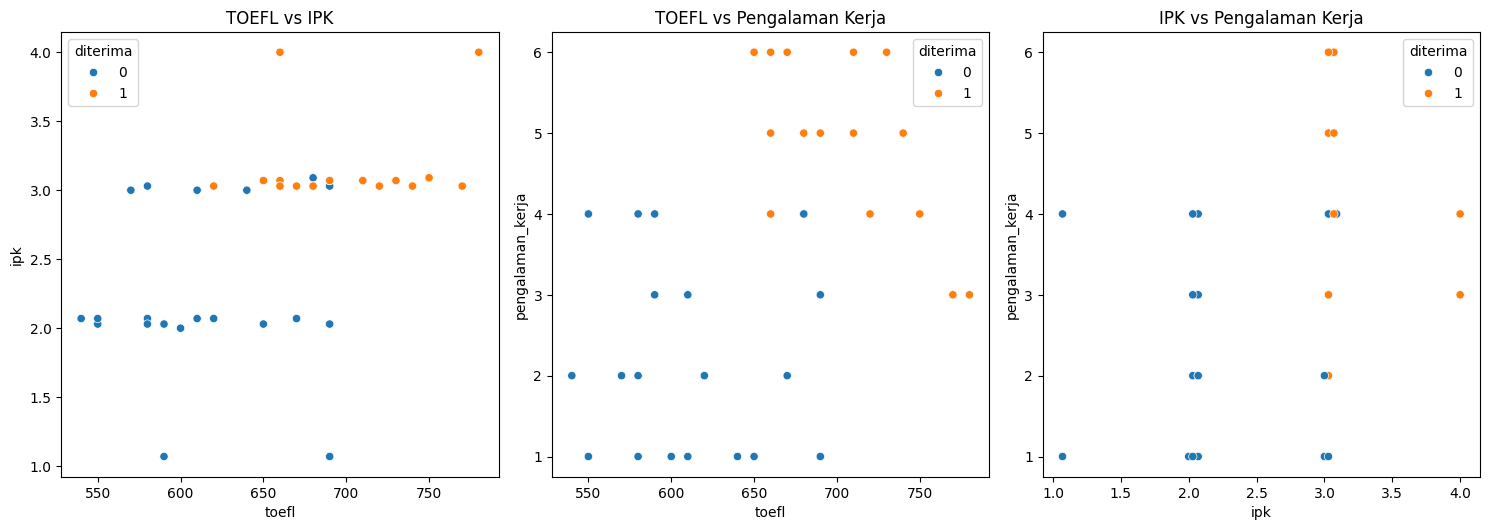

In [12]:
# Scatter plot dengan seaborn
plt.figure(figsize=(15, 10))

# TOEFL vs IPK
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='toefl', y='ipk', hue='diterima')
plt.title('TOEFL vs IPK')

# TOEFL vs Pengalaman Kerja
plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='toefl', y='pengalaman_kerja', hue='diterima')
plt.title('TOEFL vs Pengalaman Kerja')

# IPK vs Pengalaman Kerja
plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='ipk', y='pengalaman_kerja', hue='diterima')
plt.title('IPK vs Pengalaman Kerja')

plt.tight_layout()
plt.show()

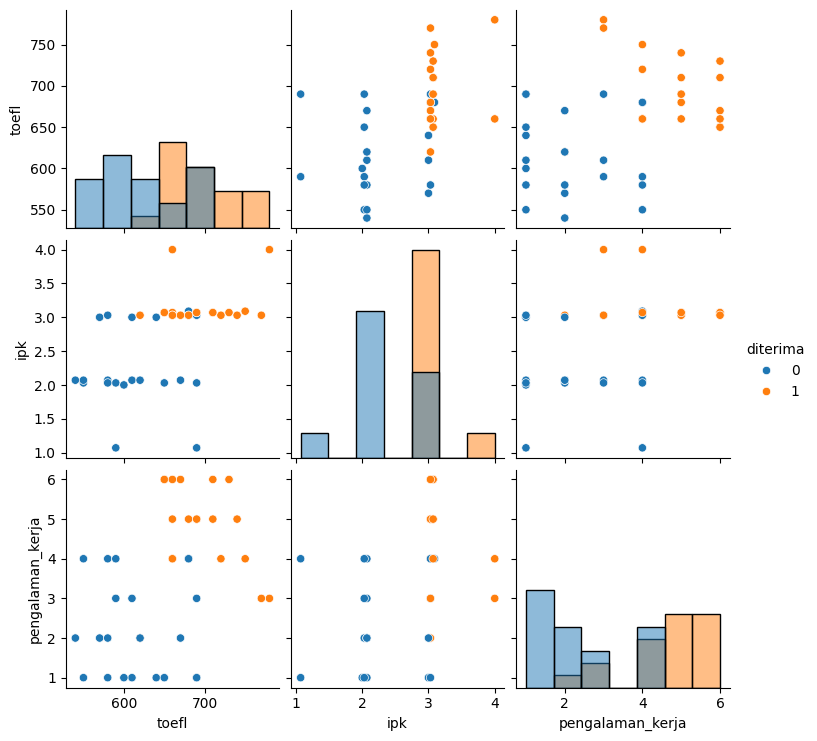

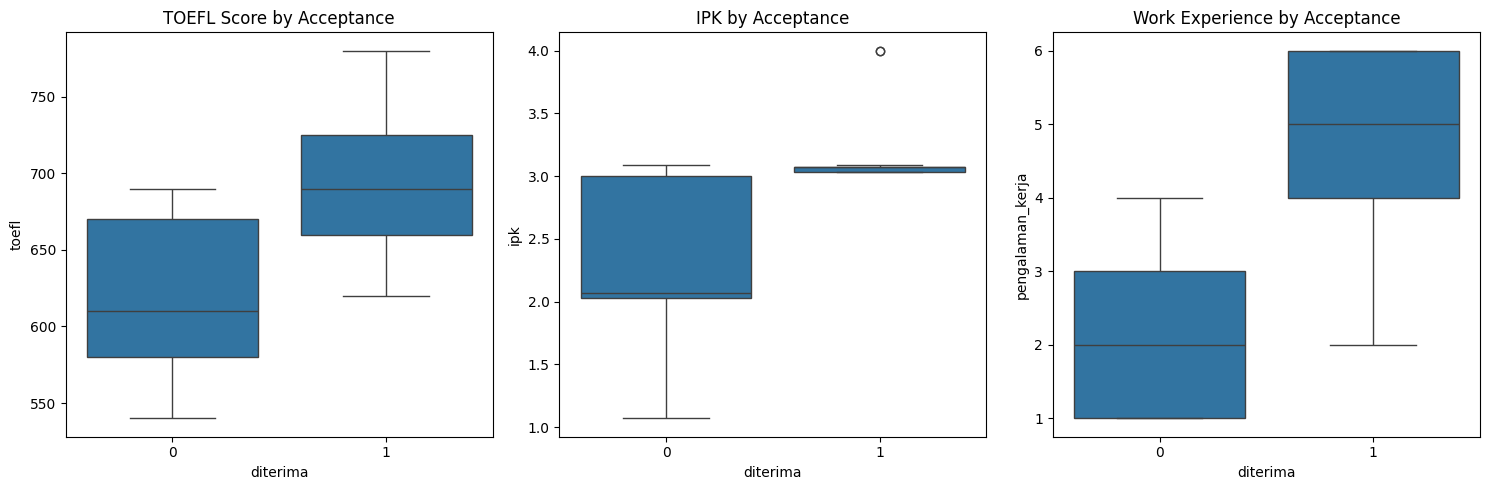

In [13]:
# Pair plot untuk melihat distribusi dan korelasi
sns.pairplot(df, hue='diterima', diag_kind='hist')
plt.show()

# Box plot untuk melihat distribusi per kategori
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(data=df, x='diterima', y='toefl', ax=axes[0])
axes[0].set_title('TOEFL Score by Acceptance')

sns.boxplot(data=df, x='diterima', y='ipk', ax=axes[1])
axes[1].set_title('IPK by Acceptance')

sns.boxplot(data=df, x='diterima', y='pengalaman_kerja', ax=axes[2])
axes[2].set_title('Work Experience by Acceptance')

plt.tight_layout()
plt.show()

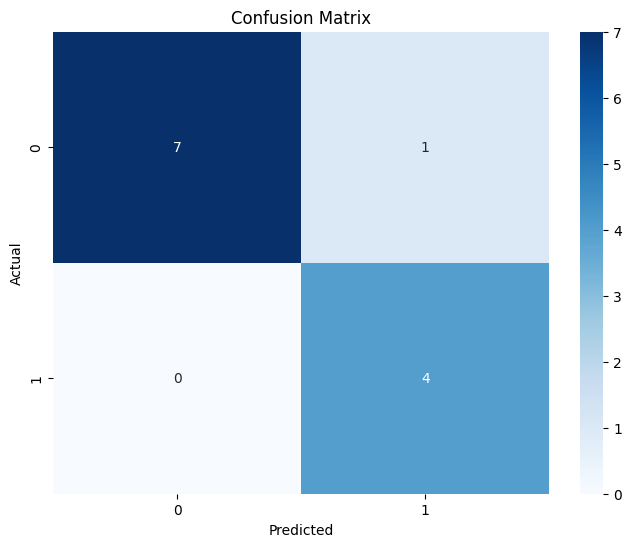

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.80      1.00      0.89         4

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12



In [14]:
# Persiapan data untuk model
X = df[['toefl', 'ipk', 'pengalaman_kerja']]
y = df['diterima']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Buat model logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prediksi
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

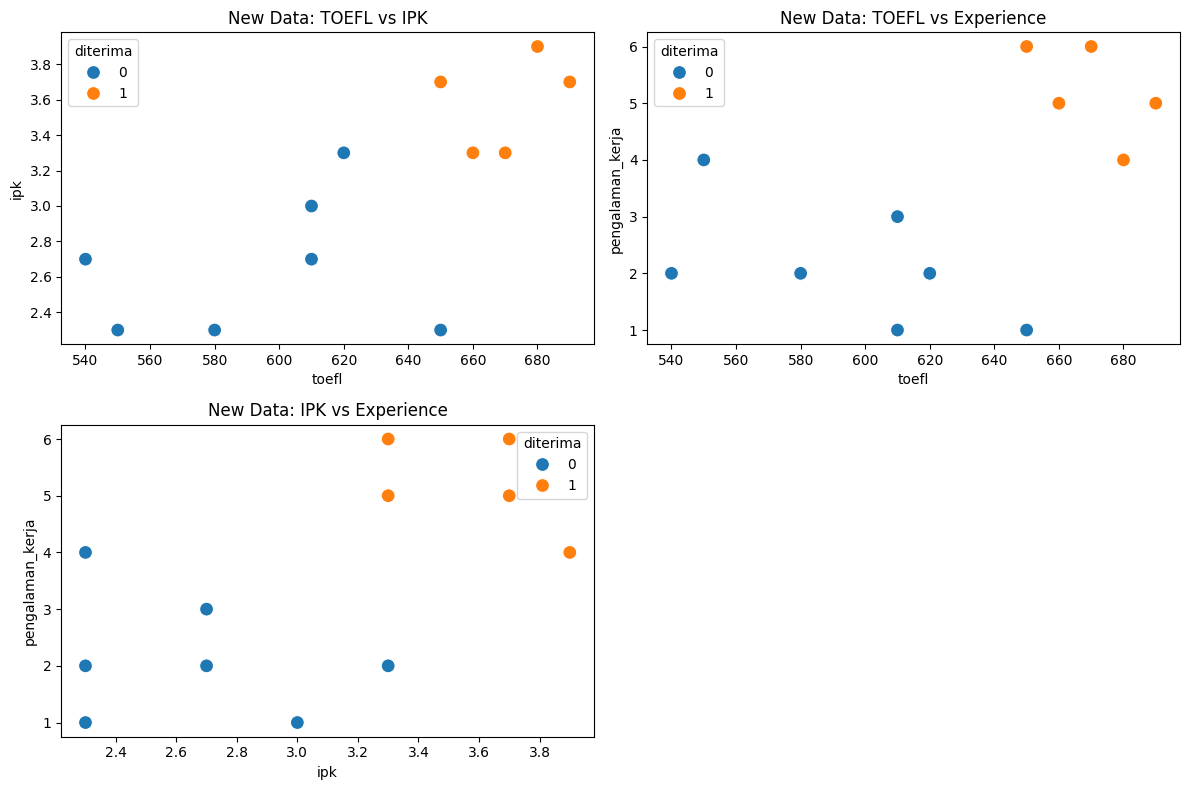

Data baru:
    toefl  ipk  pengalaman_kerja  diterima
0     550  2.3                 4         0
1     620  3.3                 2         0
2     670  3.3                 6         1
3     680  3.9                 4         1
4     610  2.7                 3         0
5     610  3.0                 1         0
6     650  3.7                 6         1
7     690  3.7                 5         1
8     540  2.7                 2         0
9     660  3.3                 5         1
10    580  2.3                 2         0
11    650  2.3                 1         0


In [15]:
# Data baru untuk prediksi
new_data = pd.DataFrame({
    'toefl': [550, 620, 670, 680, 610, 610, 650, 690, 540, 660, 580, 650],
    'ipk': [2.3, 3.3, 3.3, 3.9, 2.7, 3.0, 3.7, 3.7, 2.7, 3.3, 2.3, 2.3],
    'pengalaman_kerja': [4, 2, 6, 4, 3, 1, 6, 5, 2, 5, 2, 1],
    'diterima': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0]
})

# Visualisasi data baru
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=new_data, x='toefl', y='ipk', hue='diterima', s=100)
plt.title('New Data: TOEFL vs IPK')

plt.subplot(2, 2, 2)
sns.scatterplot(data=new_data, x='toefl', y='pengalaman_kerja', hue='diterima', s=100)
plt.title('New Data: TOEFL vs Experience')

plt.subplot(2, 2, 3)
sns.scatterplot(data=new_data, x='ipk', y='pengalaman_kerja', hue='diterima', s=100)
plt.title('New Data: IPK vs Experience')

plt.tight_layout()
plt.show()

print("Data baru:")
print(new_data)

Hasil Prediksi Pelamar Baru:
   TOEFL  IPK  Pengalaman_Kerja  Prediksi  Prob_Tidak_Diterima  Prob_Diterima  \
0    590  2.0                 3         0             0.926471       0.073529   
1    740  3.7                 4         1             0.046348       0.953652   
2    680  3.3                 6         1             0.040132       0.959868   
3    610  2.3                 1         0             0.974033       0.025967   
4    710  3.0                 5         1             0.064884       0.935116   

           Status  
0  Tidak Diterima  
1        Diterima  
2        Diterima  
3  Tidak Diterima  
4        Diterima  


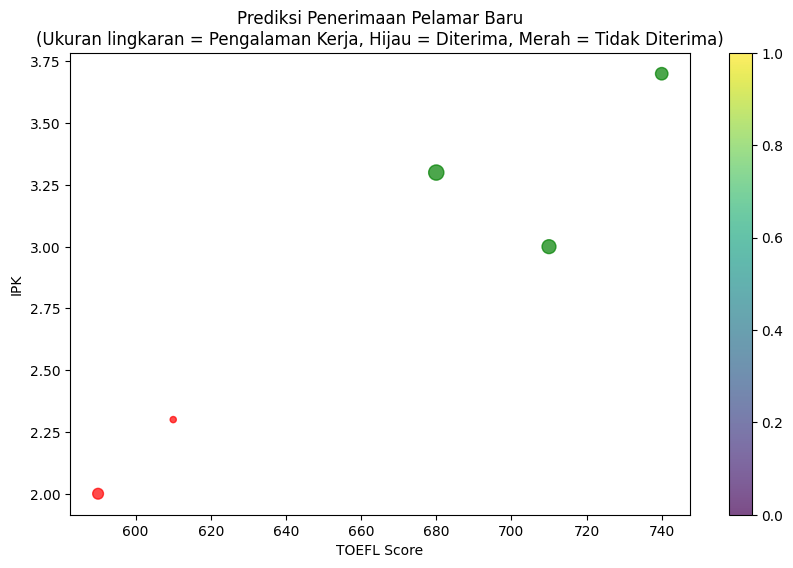

In [16]:
# Data pelamar baru untuk prediksi
pelamar_baru = pd.DataFrame({
    'toefl': [590, 740, 680, 610, 710],
    'ipk': [2.0, 3.7, 3.3, 2.3, 3.0],
    'pengalaman_kerja': [3, 4, 6, 1, 5]
})

# Prediksi menggunakan model yang sudah dibuat
prediksi = log_reg.predict(pelamar_baru)
probabilitas = log_reg.predict_proba(pelamar_baru)

# Tampilkan hasil prediksi
hasil_prediksi = pd.DataFrame({
    'TOEFL': pelamar_baru['toefl'],
    'IPK': pelamar_baru['ipk'],
    'Pengalaman_Kerja': pelamar_baru['pengalaman_kerja'],
    'Prediksi': prediksi,
    'Prob_Tidak_Diterima': probabilitas[:, 0],
    'Prob_Diterima': probabilitas[:, 1],
    'Status': ['Diterima' if p == 1 else 'Tidak Diterima' for p in prediksi]
})

print("Hasil Prediksi Pelamar Baru:")
print(hasil_prediksi)

# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
colors = ['red' if p == 0 else 'green' for p in prediksi]
plt.scatter(pelamar_baru['toefl'], pelamar_baru['ipk'],
           c=colors, s=pelamar_baru['pengalaman_kerja']*20, alpha=0.7)
plt.xlabel('TOEFL Score')
plt.ylabel('IPK')
plt.title('Prediksi Penerimaan Pelamar Baru\n(Ukuran lingkaran = Pengalaman Kerja, Hijau = Diterima, Merah = Tidak Diterima)')
plt.colorbar()
plt.show()